<a href="https://colab.research.google.com/github/stevemorrisbi/TipAnalysis/blob/main/Tip_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
# Loading sample tips Seaborn library data
df = sns.load_dataset('tips')

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# Checking the null content of the df
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [ ]:
# Parsing in columns to drop - not needed for exploratory analysis 
dropped_columns = ['sex', 'smoker', 'size']
df.drop(dropped_columns, inplace=True, axis=1)
df.head()

,total_bill,tip,day,time
0,16.99,1.01,Sun,Dinner
1,10.34,1.66,Sun,Dinner
2,21.01,3.50,Sun,Dinner
3,23.68,3.31,Sun,Dinner
4,24.59,3.61,Sun,Dinner


In [ ]:
# Generating a tip percentage column
df['tip_percentage'] = df.apply(lambda row: row['tip'] / row['total_bill'] *100, axis=1).round(2)
df.head()

,total_bill,tip,day,time,tip_percentage
0,16.99,1.01,Sun,Dinner,5.94
1,10.34,1.66,Sun,Dinner,16.05
2,21.01,3.50,Sun,Dinner,16.66
3,23.68,3.31,Sun,Dinner,13.98
4,24.59,3.61,Sun,Dinner,14.68


In [ ]:
# Cleaning titles by removing underscores and replacing with spaces ( where > contains > replace )
df.columns = np.where(df.columns.str.contains('_'), df.columns.str.replace('_', ' '), df.columns)
df.head()


,total bill,tip,day,time,tip percentage
0,16.99,1.01,Sun,Dinner,5.94
1,10.34,1.66,Sun,Dinner,16.05
2,21.01,3.50,Sun,Dinner,16.66
3,23.68,3.31,Sun,Dinner,13.98
4,24.59,3.61,Sun,Dinner,14.68


In [ ]:
# Calculating the average tip percentage by day
d_pct = df.groupby(['day'])['tip percentage']. mean().reset_index().round(2)
d_pct

,day,tip percentage
0,Thur,16.13
1,Fri,16.99
2,Sat,15.31
3,Sun,16.69


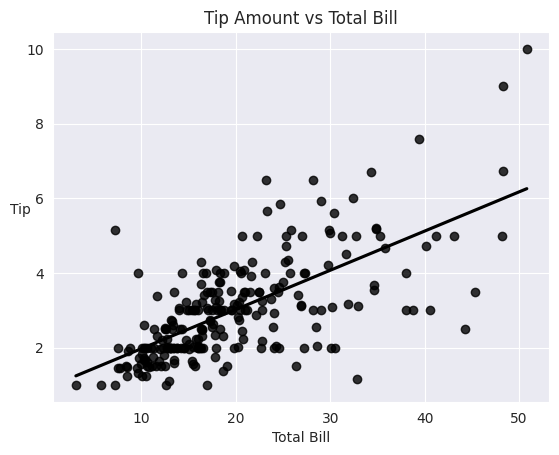

In [ ]:
# Visualising data using Seaborn -
# Setting the plot background style
sns.set_style('darkgrid')

# Creating a scatter plot with a regression line - 
sns.regplot(x = 'total bill', y = 'tip', data = df, ci=None, color = 'black')

# Adding a title for the plot
plt.title('Tip Amount vs Total Bill')

# Set X-Axis label to capitalised text
plt.xlabel('Total Bill')

# Set Y-Axis label to capitalised text and display horizontally 
plt.ylabel('Tip').set_rotation(0)

# Show the plot
plt.show()

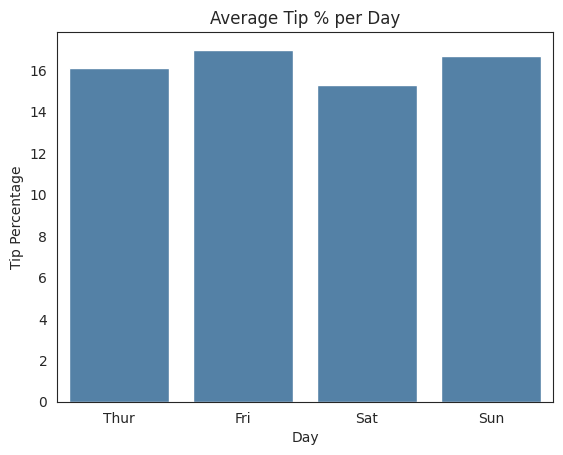

In [ ]:
# Visualising data using Seaborn -
# Setting the plot background style
sns.set_style('white')

# Creating a bar plot with for percentage on each day 
sns.barplot(x = 'day', y = 'tip percentage', data = d_pct, color='steelblue')

# Adding a title for the plot
plt.title('Average Tip % per Day')

# Set X-Axis label to capitalised text
plt.xlabel('Day')

# Set Y-Axis label to capitalised text and display horizontally 
plt.ylabel('Tip Percentage').set_rotation(90)

# Show the plot
plt.show()

In [ ]:
# Calculating the average tip percentage by time
time_pct = df.groupby(['time'])['tip percentage']. mean().reset_index().round(2)
time_pct

,time,tip percentage
0,Lunch,16.41
1,Dinner,15.95


In [ ]:
# Calculating the average by both time and day
time_and_day = df.groupby(['time', 'day'])['tip percentage']. mean().reset_index().round(2)

In [ ]:
# Removing days and times that don;t have a tip percentage 
# Finding the day and time with the highest tip percentage 
no_missing = time_and_day.dropna(subset=['tip percentage'])
no_missing.sort_values(by = ['tip percentage'],ascending=False)

,time,day,tip percentage
1,Lunch,Fri,18.88
7,Dinner,Sun,16.69
0,Lunch,Thur,16.13
4,Dinner,Thur,15.97
5,Dinner,Fri,15.89
6,Dinner,Sat,15.31
